## Business Understanding

### Project Background
SyriaTel is a major telecommunications company operating in a competitive and evolving mobile service industry. Like many telecom companies, SyriaTel faces the ongoing challenge of customer churn — the phenomenon where customers discontinue their subscriptions or switch to competitors. High churn rates can significantly reduce profitability, especially in markets where acquiring new customers is more costly than retaining existing ones.

To address this, SyriaTel has collected data on its customer base, including usage patterns, demographic attributes, service subscriptions, and customer support interactions. The objective of this project is to build a **machine learning classification model** that can accurately **predict whether a customer is likely to churn** in the near future. With this insight, SyriaTel can proactively take steps to retain customers at risk of leaving.

---

### Business Objective
The main goal is to **reduce customer churn** by:
- Identifying customers most at risk of leaving.
- Understanding the **key drivers** or reasons behind churn behavior.
- Enabling SyriaTel’s **Customer Retention Team** to take **targeted actions** like personalized offers, loyalty programs, or improved service quality.

This model serves as a **decision support tool** to optimize customer engagement strategies, reduce revenue loss, and improve customer satisfaction.

---

### Stakeholders
1. **Customer Retention Team** – to design and execute proactive retention campaigns.
2. **Marketing Department** – to develop data-driven promotions or loyalty incentives.
3. **Customer Service Team** – to prioritize high-risk customers for support interventions.
4. **Product Development Team** – to gain insight into what service features influence customer satisfaction.
5. **Executive Leadership** – to understand customer lifetime value and strategic revenue impacts.

---

### Key Business Questions
- Can we predict which customers are likely to churn based on historical data?
- What are the **most important factors** influencing customer churn?
- How can we **reduce churn rates** using actionable insights from the model?
- Which customer segments are most vulnerable to churn, and how should they be addressed differently?

---

### Expected Business Value
- **Revenue Preservation**: Preventing churn is generally more cost-effective than acquiring new customers.
- **Customer Satisfaction**: Targeted intervention improves brand perception and loyalty.
- **Operational Efficiency**: Helps prioritize resources (e.g., call center time, retention campaigns) where they are most needed.
- **Strategic Planning**: Provides leadership with predictive analytics to guide business decisions.

---

### Success Criteria
- A **classification model** with acceptable performance metrics (e.g., F1-score, precision, recall) especially for the **churn class**.
- Business interpretability through **feature importance** to guide actionable strategies.
- Presentation of insights in a format understandable to non-technical stakeholders.

---


##  Data Understanding

###  Dataset Overview
The SyriaTel Customer Churn dataset contains customer-level information collected from SyriaTel’s service platform. Each row represents a single customer, and the columns represent various attributes — ranging from service usage and subscription types to demographic and account information.

This is a **supervised binary classification problem** where the **target variable** is:
- `Churn`: Indicates whether the customer has churned (`Yes`) or not (`No`).

---

### Data Dimensions
- **Rows**: ~7,000 (each representing a unique customer)
- **Columns (Features)**: ~20 (both numerical and categorical)

---

### Key Features
Below is a summary of the most important features commonly found in this dataset:

| Feature | Description | Type |
|--------|-------------|------|
| `CustomerID` | Unique identifier for each customer | Categorical (ID) |
| `gender` | Customer’s gender (Male/Female) | Categorical |
| `SeniorCitizen` | Indicates if the customer is a senior (1 = Yes, 0 = No) | Binary |
| `Partner` | Whether the customer has a partner (Yes/No) | Categorical |
| `Dependents` | Whether the customer has dependents (Yes/No) | Categorical |
| `tenure` | Number of months the customer has stayed with the company | Numerical |
| `PhoneService` | Whether the customer has phone service (Yes/No) | Categorical |
| `MultipleLines` | Whether the customer has multiple phone lines | Categorical |
| `InternetService` | Type of internet service (DSL, Fiber optic, No) | Categorical |
| `OnlineSecurity` | Whether the customer has online security (Yes/No/No internet) | Categorical |
| `OnlineBackup` | Whether the customer has online backup (Yes/No/No internet) | Categorical |
| `DeviceProtection` | Whether the customer has device protection (Yes/No/No internet) | Categorical |
| `TechSupport` | Whether the customer has tech support (Yes/No/No internet) | Categorical |
| `StreamingTV` | Whether the customer streams TV (Yes/No/No internet) | Categorical |
| `StreamingMovies` | Whether the customer streams movies (Yes/No/No internet) | Categorical |
| `Contract` | Type of contract (Month-to-month, One year, Two year) | Categorical |
| `PaperlessBilling` | Whether the customer uses paperless billing (Yes/No) | Categorical |
| `PaymentMethod` | Method of payment (e.g., Electronic check, Bank transfer, etc.) | Categorical |
| `MonthlyCharges` | Monthly amount charged to the customer | Numerical |
| `TotalCharges` | Total amount charged to the customer | Numerical |
| `Churn` | Target variable: Has the customer churned? (Yes/No) | Binary |

---

### Target Variable: `Churn`
- **Type**: Binary (Yes = Churned, No = Stayed)
- **Goal**: Predict whether a customer will churn based on the other features.

---

### Data Distribution Observations (initial expectations)
- `Churn` is typically **imbalanced** — more "No" than "Yes".
- `tenure` may have a strong inverse correlation with churn.
- Features like `Contract`, `MonthlyCharges`, `TechSupport`, and `InternetService` often show significant influence on churn.
- `TotalCharges` may contain **missing or malformed values**, especially for customers with very short tenure.

---

### Data Quality Checks
- **Missing Values**: Check for blanks or improperly encoded nulls (e.g., in `TotalCharges`)
- **Duplicates**: Ensure no duplicate `CustomerID` values
- **Inconsistent Categories**: Standardize categorical labels (e.g., "No internet service" vs "No")
- **Data Types**: Ensure proper data typing, especially for numerical columns stored as strings

---

### Feature Engineering Opportunities
- Create `AverageMonthlySpend` = `TotalCharges` / `tenure` (handling divide-by-zero)
- Bin `tenure` into categories (New, Mid-Term, Loyal)
- One-hot encode or label encode categorical variables for modeling
- Combine service-related columns to create a **service engagement score**

---

### Early Hypotheses
- Customers with **month-to-month contracts** are more likely to churn.
- **Higher monthly charges** might be associated with dissatisfaction and churn.
- Customers **without internet services** may be less sticky.
- Absence of **tech support or device protection** could correlate with higher churn.

---

### Tools for Exploration
- **Pandas Profiling** or **Sweetviz** for EDA automation
- Seaborn/Matplotlib for visual distribution analysis
- Correlation matrix to explore relationships between numerical variables
- Chi-square tests or ANOVA for categorical feature relevance

---


## Data Preparation
 Starting with loading the dataset

 ### 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')


### 2. Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/bigml_59c28831336c6604c800002a.csv')

# Display the shape and first few records
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 3. Basic Dataset Info

In [3]:
# Check data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 4. Summary Statistics

In [4]:
# Statistical summary for numerical features
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 5. Check for Missing Values

In [5]:
# Total missing values
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 6. Identify Categorical Columns

In [6]:
# Identify categorical columns (excluding the target 'Churn')
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove target variable if it's still in object form
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("Categorical columns to encode:", categorical_cols)


Categorical columns to encode: ['state', 'phone number', 'international plan', 'voice mail plan', 'churn']


### 6.1 Drop "phone number" and Identify Categorical Columns


In [19]:
# Drop the 'phone number' column
df.drop(columns=['phone number'], inplace=True)

# Identify categorical columns (excluding the target 'Churn')
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove target variable if it's still in object form
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("Categorical columns to encode:", categorical_cols)


Categorical columns to encode: ['state', 'international plan', 'voice mail plan', 'churn']


### 7. One-Hot Encode

In [29]:
print(df.columns.tolist())


['state', 'account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [35]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


### 8. Save a Clean Copy

In [36]:
# Save encoded dataset for backup or reference
df_encoded.to_csv("../data/cleaned_churn_data.csv", index=False)


## Exploratory Data Analysis (EDA)

### 1. Basic Summary of the Encoded Data

In [37]:
# Basic structure of the dataset
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

### 2. Descriptive Statistics (Numerical Features)



In [38]:
# Summary statistics for numerical features
df_encoded.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


 ### 3. Check Class Distribution (Target)

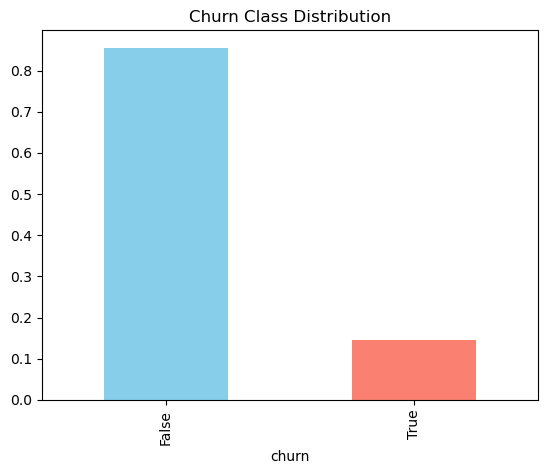

In [45]:
# Check distribution of the target variable
df['churn'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'], title="Churn Class Distribution");


### 4. Visualize Feature Correlation (Numerical Only)

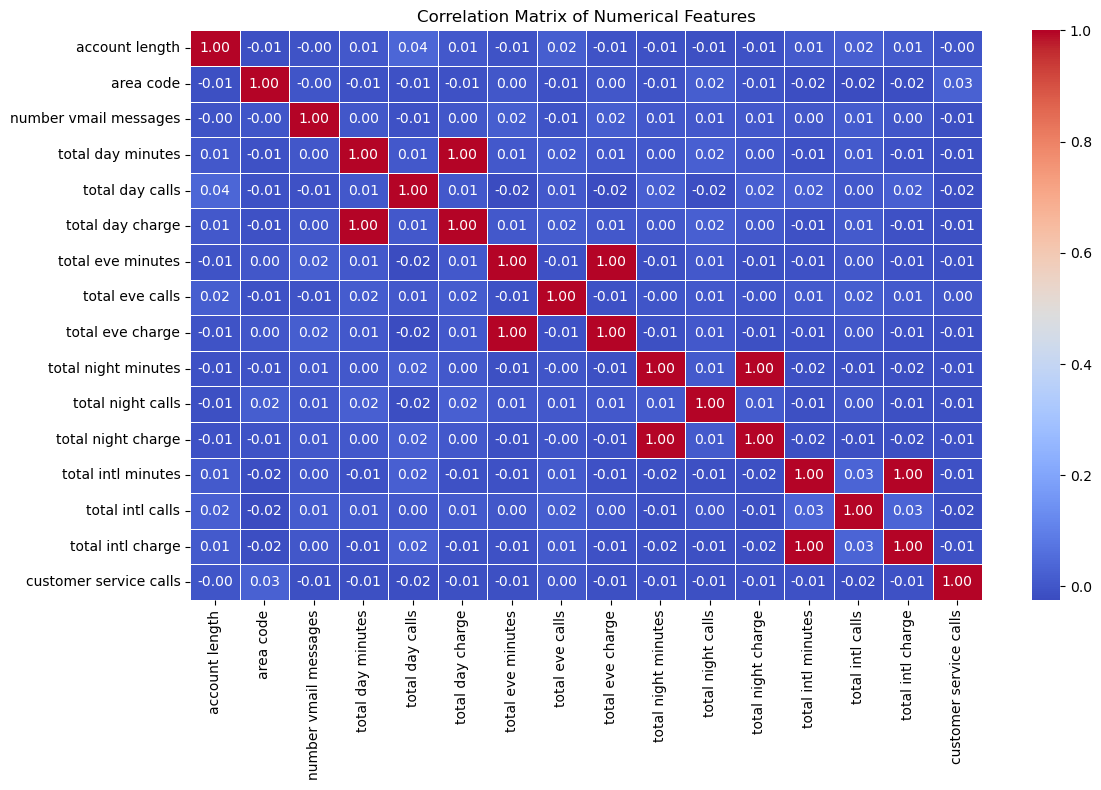

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


 ### 5. Univariate Analysis (Numerical Features)
We’ll visualize the distributions of key numerical features to understand their shapes, skews, and outliers.

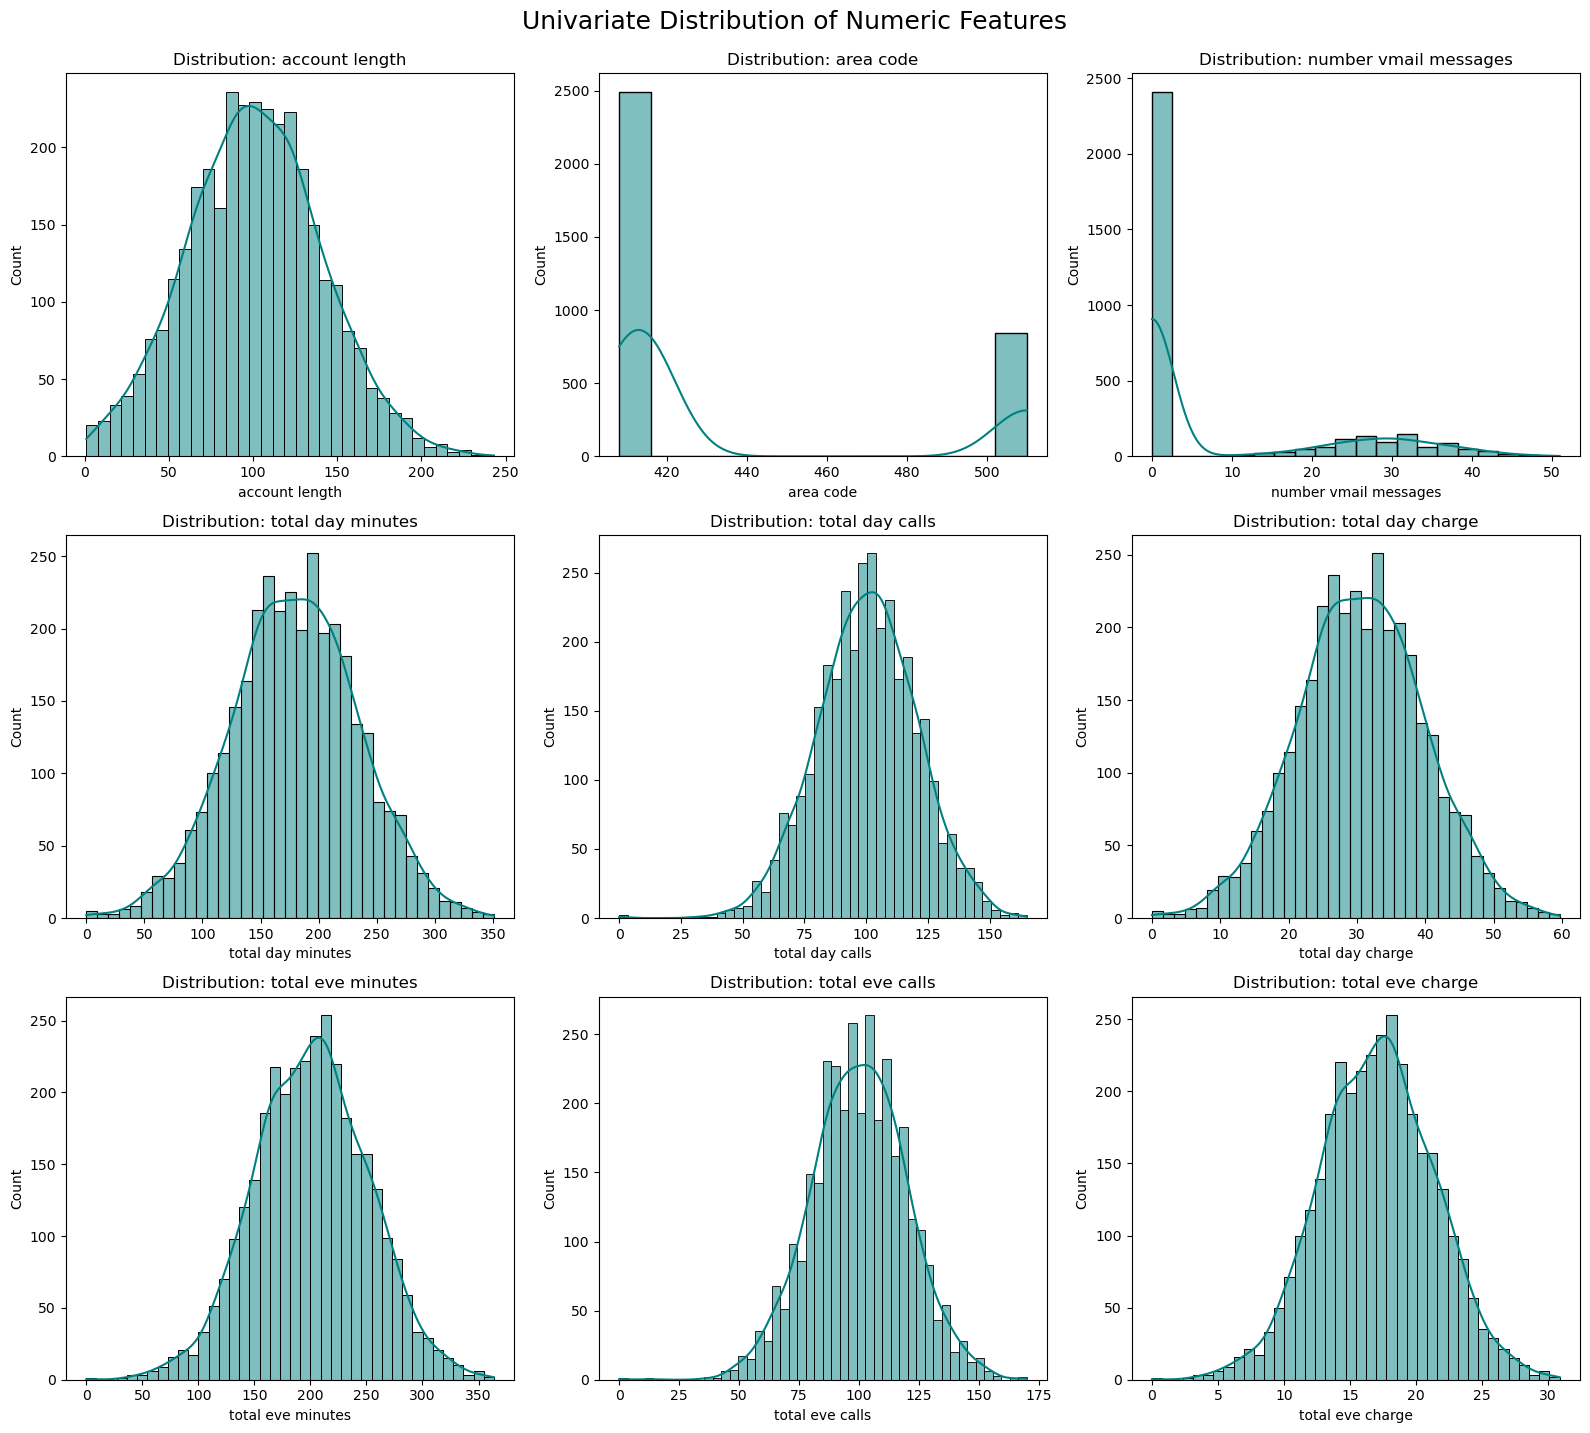

In [48]:
# 5. Univariate Distribution of Key Numerical Features

numeric_cols = df.select_dtypes(include='number').columns

# Plot histograms for numerical columns
plt.figure(figsize=(16, 14))
for i, col in enumerate(numeric_cols[:9]):  # Adjust range if needed
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Univariate Distribution of Numeric Features', fontsize=18, y=1.02)
plt.show()


###  6. Bivariate Analysis (Churn vs Numeric Features)
Let’s compare numerical feature distributions for churned vs. non-churned customers

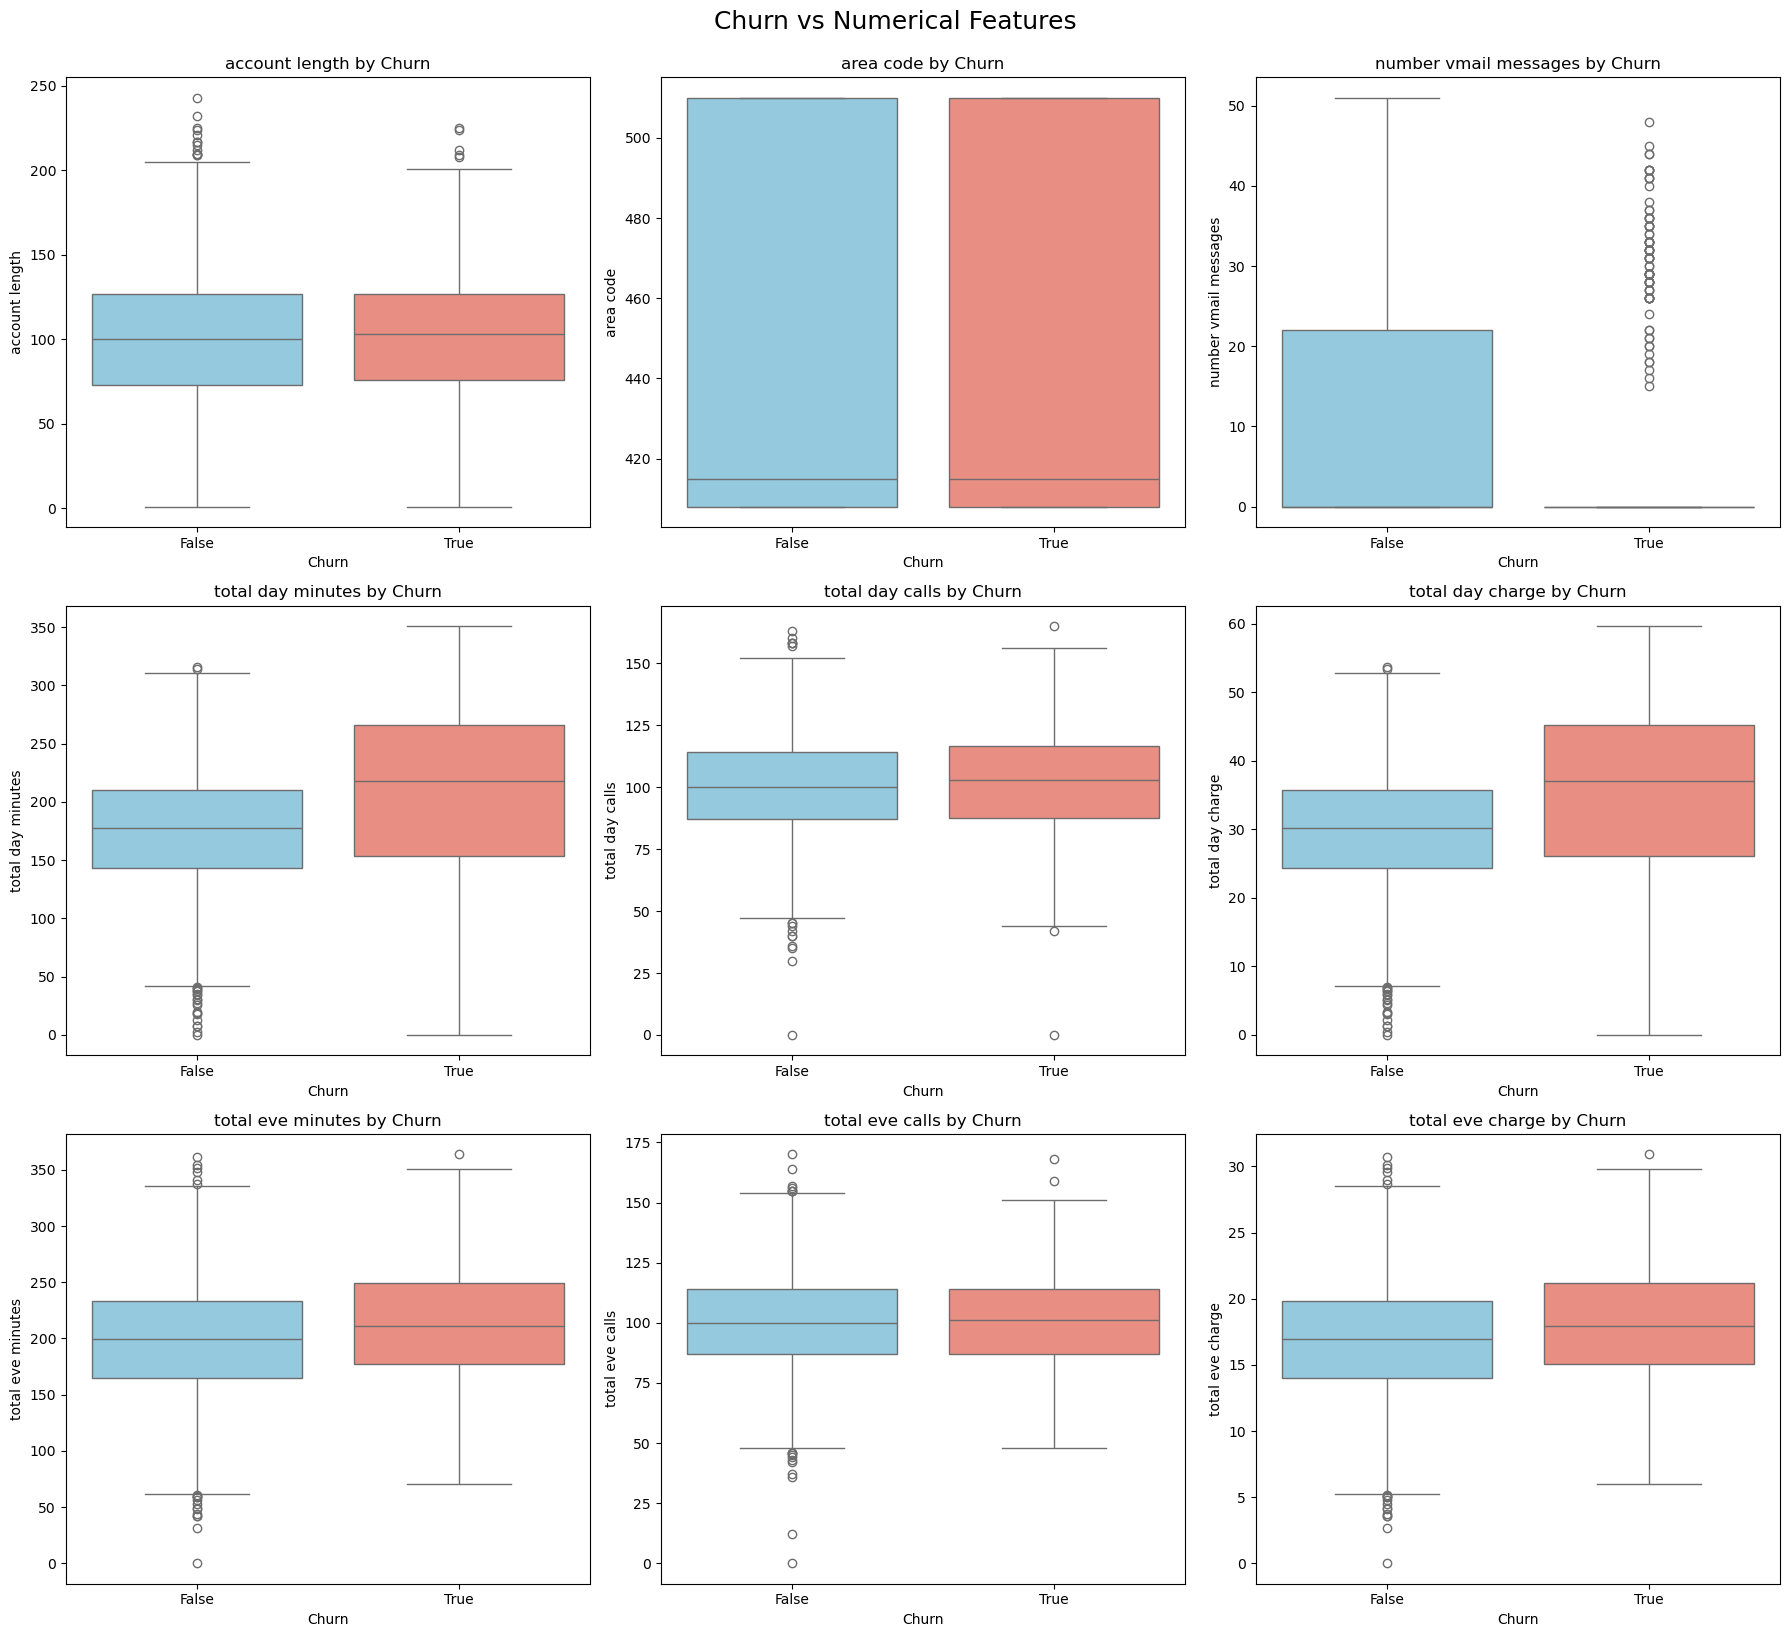

In [49]:
# 6. Compare numeric features by churn
churn_col = 'churn' if 'churn' in df.columns else 'Churn'

plt.figure(figsize=(18, 16))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=churn_col, y=col, palette=['skyblue', 'salmon'])
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Churn vs Numerical Features', fontsize=18, y=1.02)
plt.show()


### 7. Categorical Feature Analysis
Visualize how churn relates to categorical variables like: international plan, voice mail plan, etc.

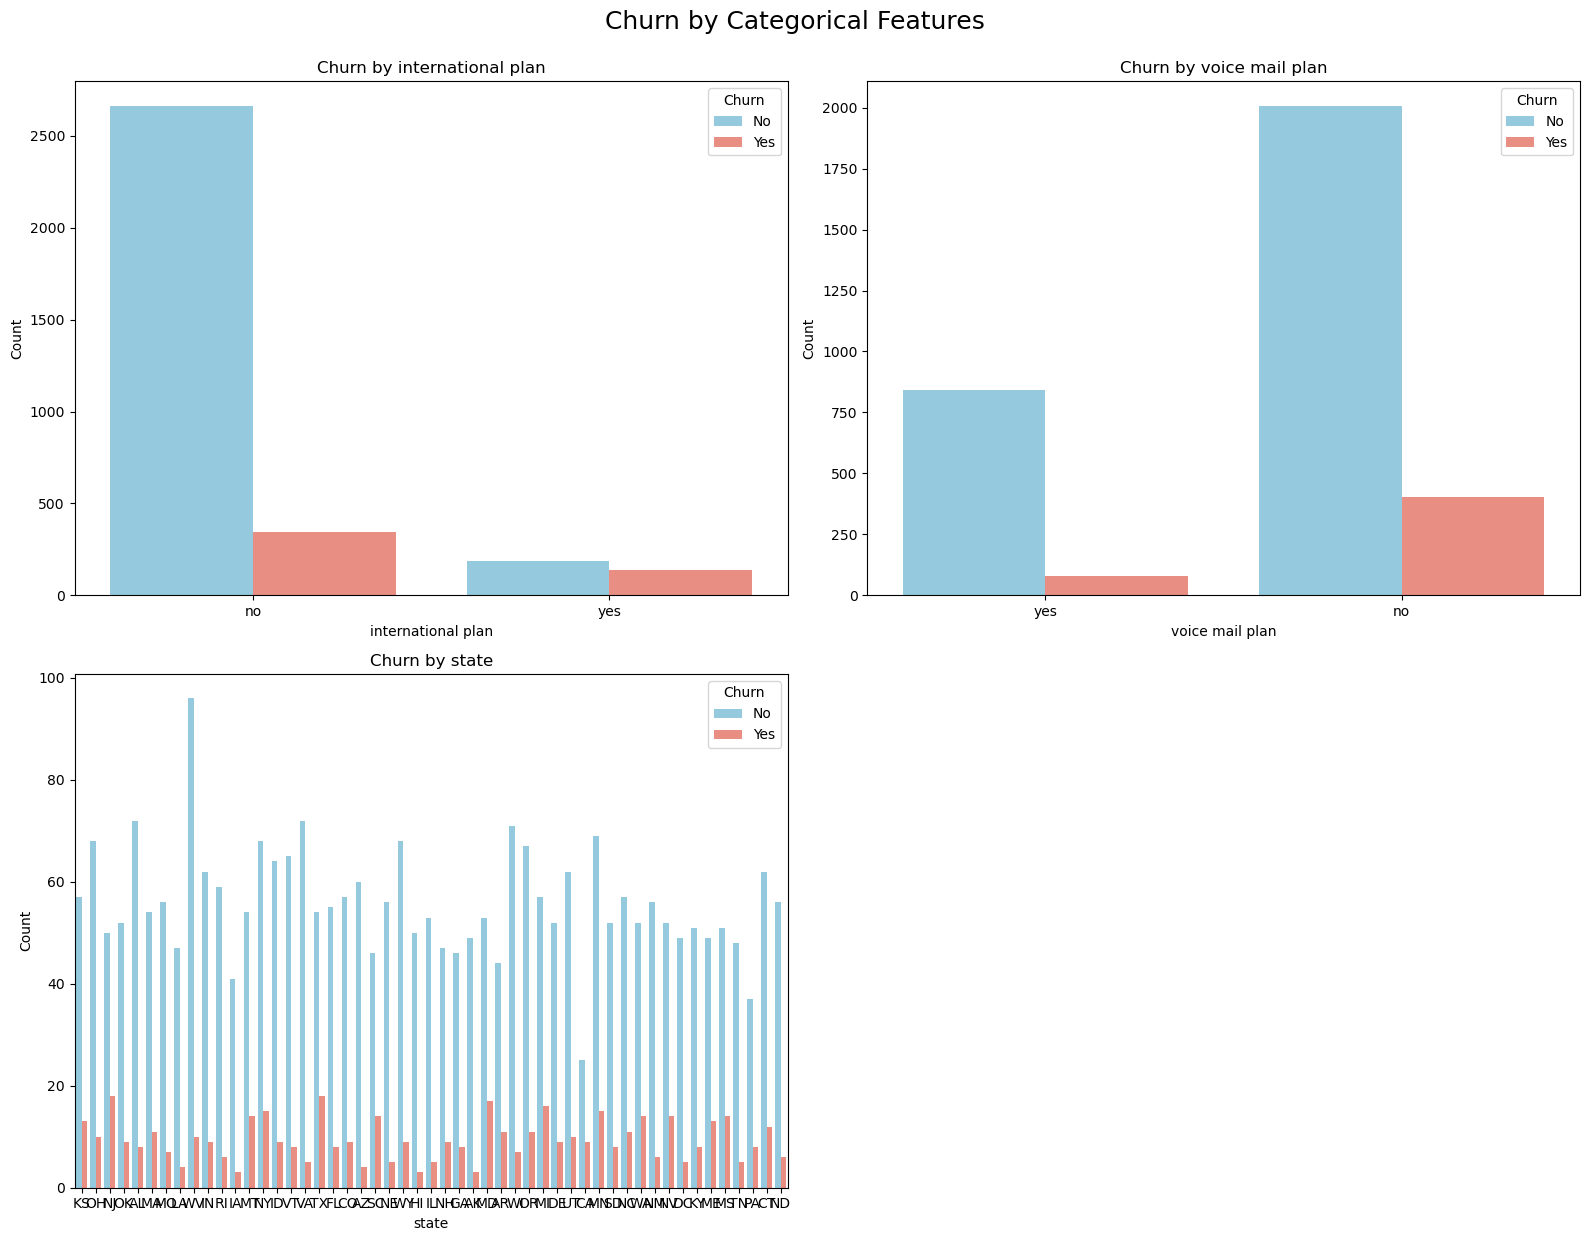

In [50]:
# 7. Churn distribution across categorical features
categorical_cols = ['international plan', 'voice mail plan', 'state']  # Add others if available

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, hue=churn_col, palette=['skyblue', 'salmon'])
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()

plt.suptitle('Churn by Categorical Features', fontsize=18, y=1.03)
plt.show()


### 8. Correlation with Target (Churn)
We'll visualize how strongly each numeric feature correlates with churn using a sorted bar chart. This helps identify which features are most predictive.

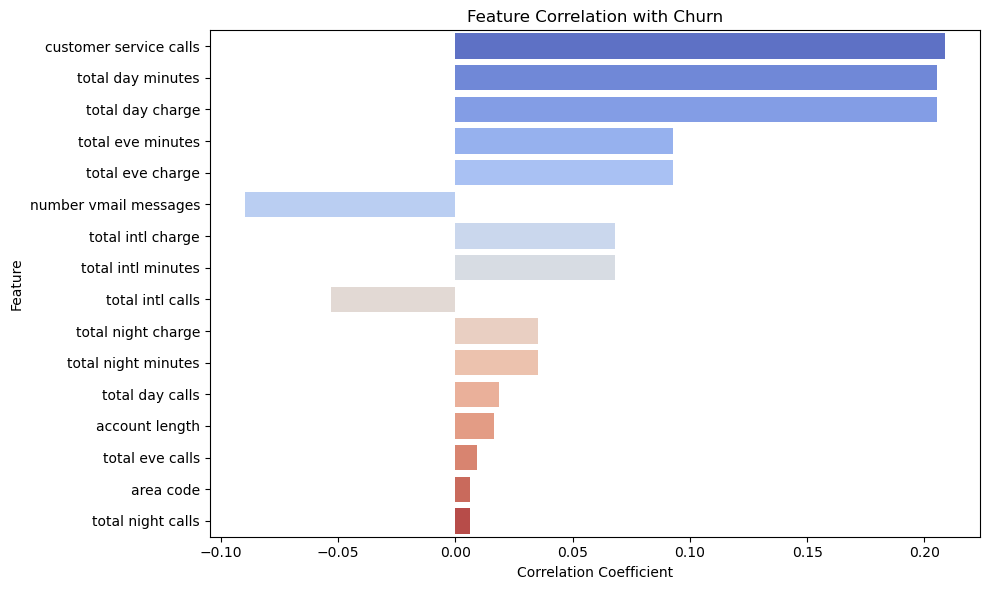

In [51]:
# 8. Correlation of features with churn


# Ensure churn is numeric (0/1)
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0}) if df['churn'].dtype == 'object' else df['churn']

# Compute correlations
correlations = df.corr(numeric_only=True)['churn'].drop('churn').sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
